# 📌 Extracción

In [2]:
import json
import pandas as pd
import requests

# URL cruda del archivo JSON en GitHub
url = 'https://raw.githubusercontent.com/Ivesqui/ChallengeTelecomX/main/Data/TelecomX_Data.json'

# Descargar y cargar el JSON
response = requests.get(url)
data = json.loads(response.text)

# Normalizar los datos anidados
df = pd.json_normalize(data)

# Vista previa de los datos
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# 🔧 Transformación

In [4]:
# Renombrar columnas para mayor claridad
df.columns = df.columns.str.replace(r'\.', '_', regex=True)

# Convertir columnas numéricas que vienen como texto
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce')

# Eliminar registros sin información de churn
df = df.dropna(subset=['Churn'])

# Transformar 'Churn' en binaria
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Convertir 'SeniorCitizen' a categórica
df['customer_SeniorCitizen'] = df['customer_SeniorCitizen'].map({1: 'Yes', 0: 'No'})

# Verificar datos
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7043 non-null   float64
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   object 
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

# 📊 Carga y análisis

Tasa de evasión: 26.54%


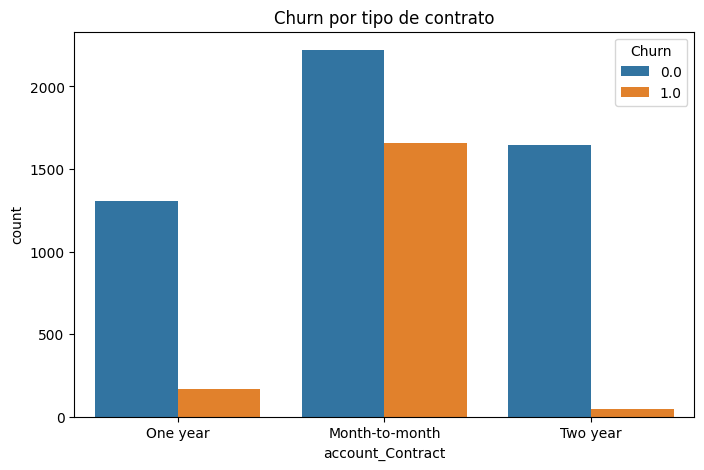

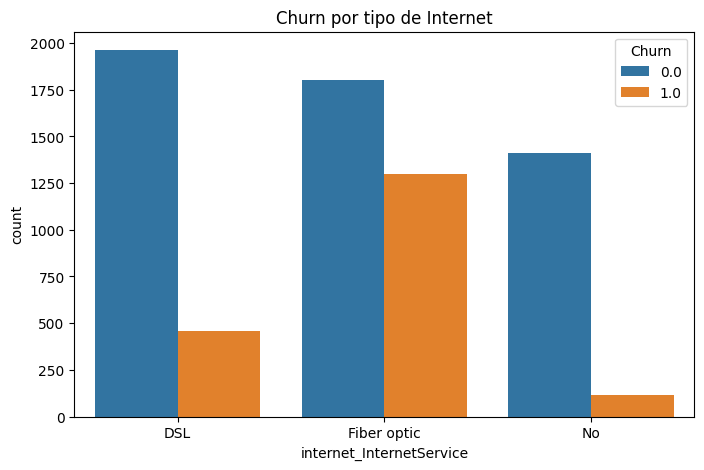

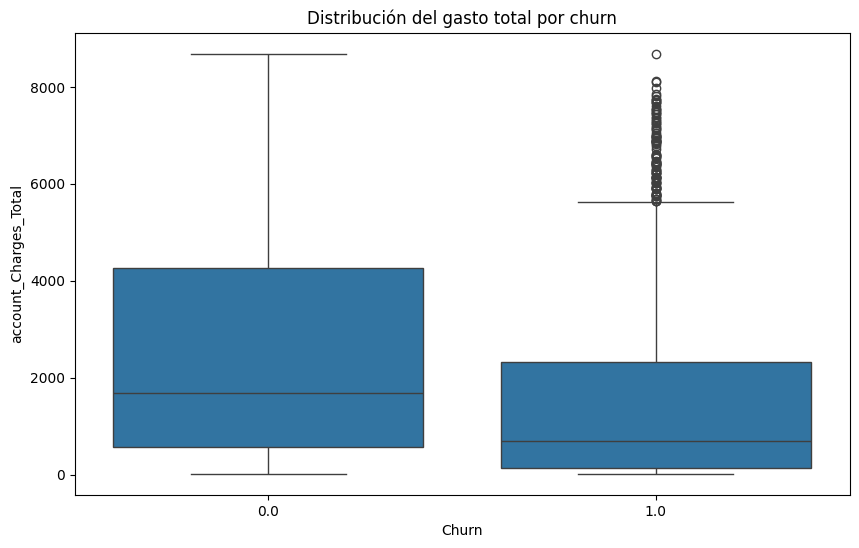

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tasa de evasión
churn_rate = df['Churn'].mean()
print(f"Tasa de evasión: {churn_rate:.2%}")

# Churn por tipo de contrato
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='account_Contract', hue='Churn')
plt.title('Churn por tipo de contrato')
plt.show()

# Churn por tipo de internet
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='internet_InternetService', hue='Churn')
plt.title('Churn por tipo de Internet')
plt.show()

# Gasto total por churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='account_Charges_Total', data=df)
plt.title('Distribución del gasto total por churn')
plt.show()

# 🔄 Complemento: Análisis visual avanzado

🔹 1. Mapa de calor de correlación

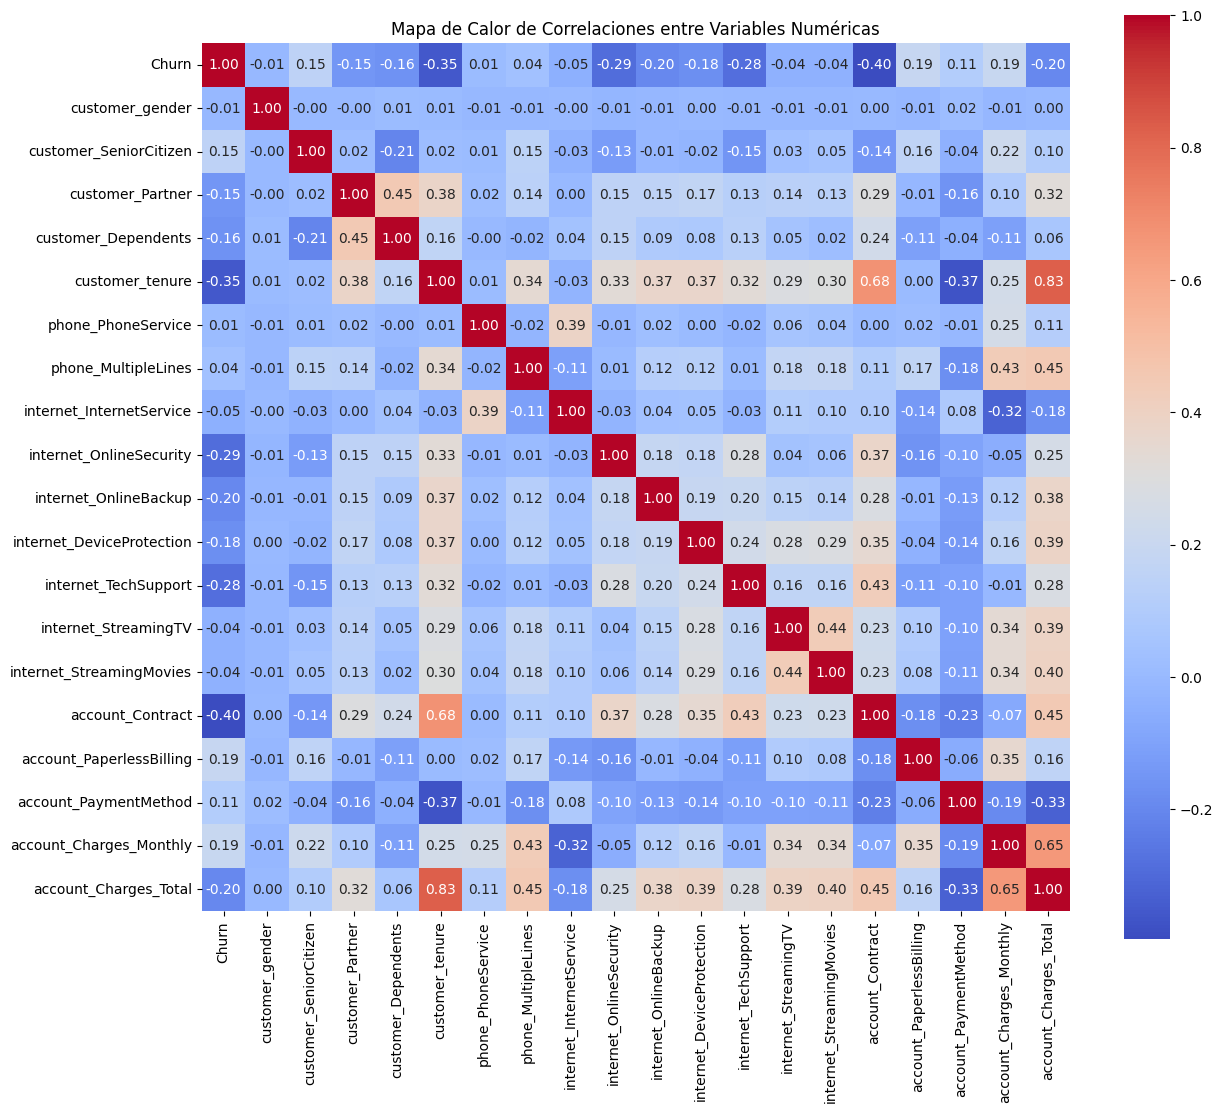

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear copia del DataFrame
df_corr = df.copy()

# Columnas categóricas a convertir a códigos numéricos
cat_cols = [
    'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents',
    'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
    'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection',
    'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies',
    'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod'
]

# Solo convertir columnas que existen en el DataFrame
cat_cols = [col for col in cat_cols if col in df_corr.columns]

# Codificar categorías como números
for col in cat_cols:
    df_corr[col] = df_corr[col].astype('category').cat.codes

# Eliminar columnas que aún no sean numéricas o tengan valores nulos
df_corr_clean = df_corr.select_dtypes(include='number').dropna()

# Crear mapa de calor de correlaciones
plt.figure(figsize=(14, 12))
sns.heatmap(df_corr_clean.corr(), cmap='coolwarm', annot=True, fmt=".2f", square=True)
plt.title('Mapa de Calor de Correlaciones entre Variables Numéricas')
plt.show()




🔹 2. Distribución de clientes por tiempo de contrato (tenure) y churn

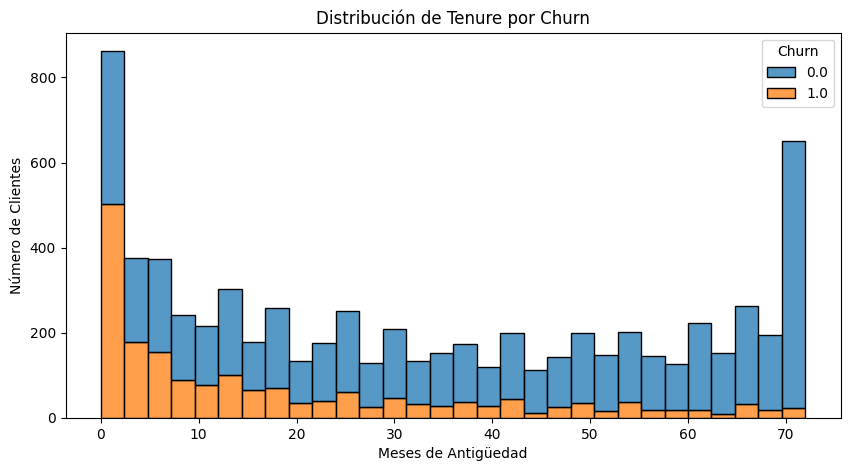

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='customer_tenure', bins=30, hue='Churn', multiple='stack')
plt.title('Distribución de Tenure por Churn')
plt.xlabel('Meses de Antigüedad')
plt.ylabel('Número de Clientes')
plt.show()



🔹 3. Churn por cada servicio adicional

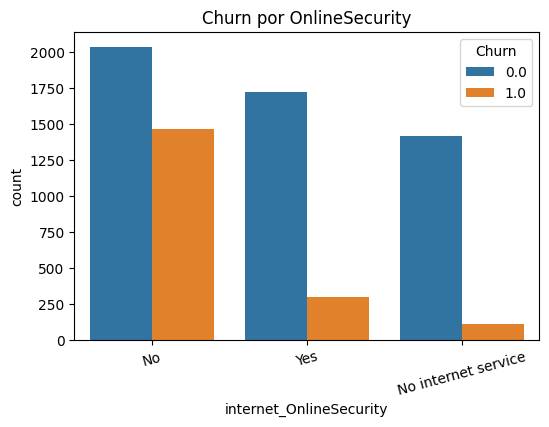

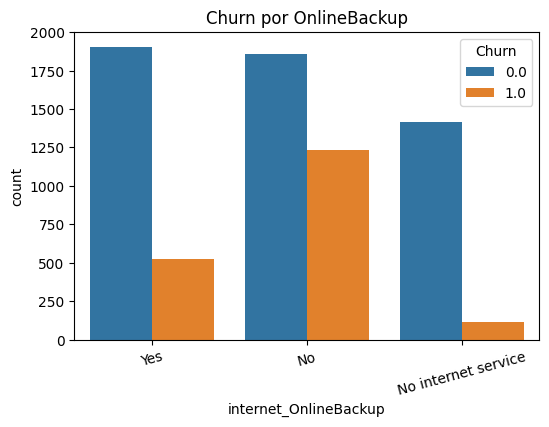

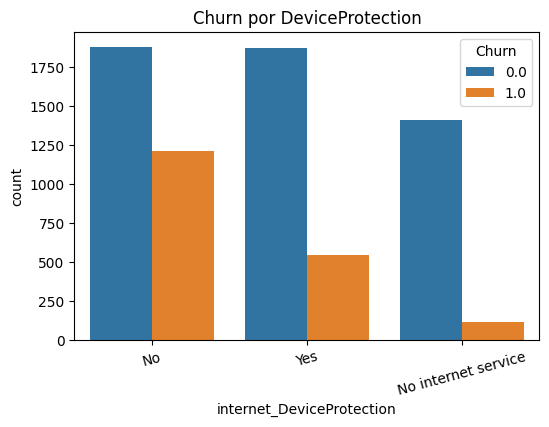

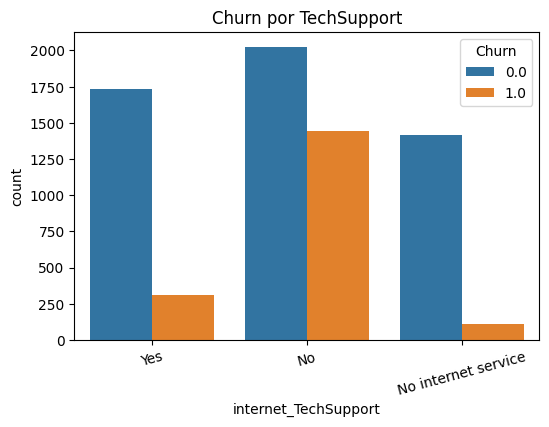

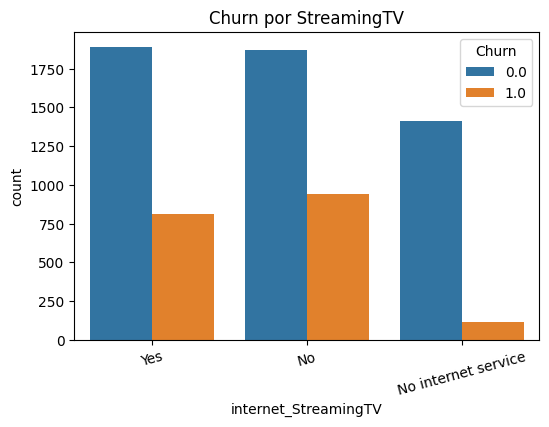

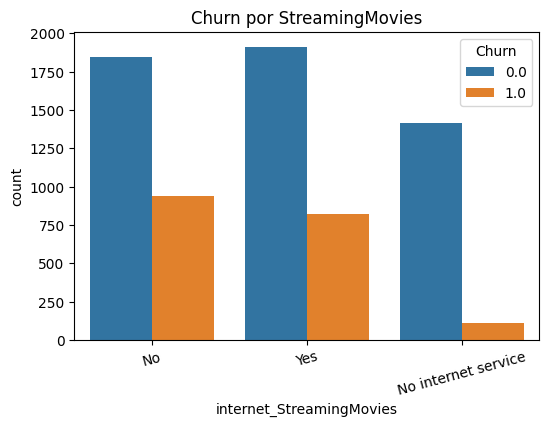

In [12]:
services = [
    'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection',
    'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies'
]

for service in services:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=service, hue='Churn')
    plt.title(f"Churn por {service.split('_')[1]}")
    plt.xticks(rotation=15)
    plt.show()


🔹 5. Clientes senior y con dependientes

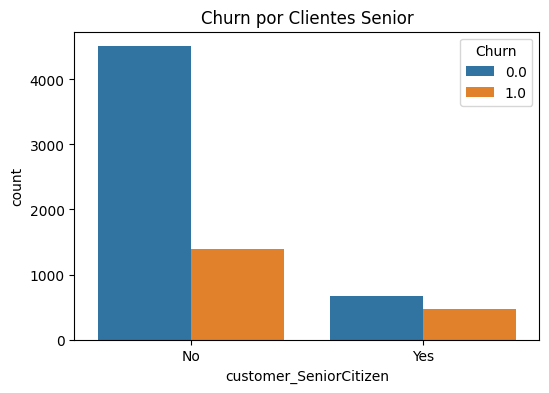

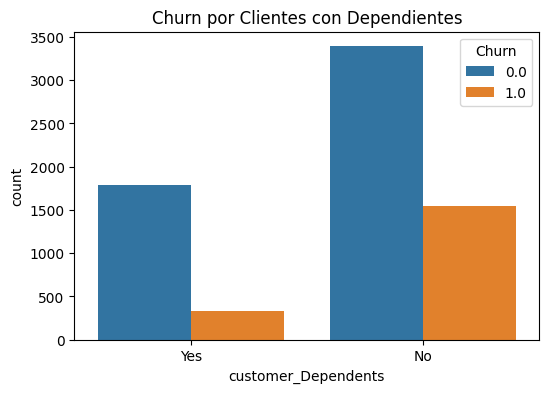

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='customer_SeniorCitizen', hue='Churn')
plt.title('Churn por Clientes Senior')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='customer_Dependents', hue='Churn')
plt.title('Churn por Clientes con Dependientes')
plt.show()


# 📄Informe Preliminar

In [11]:
# Cálculos clave
churn_rate = df['Churn'].mean() * 100
contract_churn = df.groupby('account_Contract')['Churn'].mean().sort_values(ascending=False) * 100
internet_churn = df.groupby('internet_InternetService')['Churn'].mean().sort_values(ascending=False) * 100
paperless_churn = df.groupby('account_PaperlessBilling')['Churn'].mean() * 100
payment_churn = df.groupby('account_PaymentMethod')['Churn'].mean().sort_values(ascending=False) * 100
tenure_churn = df.groupby('Churn')['customer_tenure'].mean()
monthly_charges = df.groupby('Churn')['account_Charges_Monthly'].mean()

# Informe
print("🔍 Informe Final - Evasión de Clientes en Telecom X\n")
print(f"Tasa general de evasión: {churn_rate:.2f}%\n")

print("📌 Conclusiones principales basadas en los datos:\n")

print(f"1. Los contratos 'Month-to-month' presentan una tasa de churn de {contract_churn['Month-to-month']:.2f}%, muy superior a:")
print(f"   - 'One year': {contract_churn['One year']:.2f}%")
print(f"   - 'Two year': {contract_churn['Two year']:.2f}%")

print(f"\n2. Los clientes con servicio de Internet 'Fiber optic' tienen una tasa de churn de {internet_churn.get('Fiber optic', 0):.2f}%,")
print(f"   comparado con 'DSL': {internet_churn.get('DSL', 0):.2f}% y 'No': {internet_churn.get('No', 0):.2f}%")

print(f"\n3. La facturación electrónica ('Yes') presenta una evasión de {paperless_churn.get('Yes', 0):.2f}%,")
print(f"   mientras que la facturación tradicional ('No') tiene {paperless_churn.get('No', 0):.2f}%")

print(f"\n4. El método de pago con mayor churn es '{payment_churn.idxmax()}' con {payment_churn.max():.2f}%")

print(f"\n5. La antigüedad promedio (tenure) de clientes que abandonan es de {tenure_churn[1]:.1f} meses,")
print(f"   mientras que los que se quedan tienen un promedio de {tenure_churn[0]:.1f} meses")

print(f"\n6. Los clientes que se van tienen un cargo mensual promedio de ${monthly_charges[1]:.2f},")
print(f"   comparado con ${monthly_charges[0]:.2f} para los que permanecen.\n")

print("✅ Recomendaciones:")
print("- Priorizar estrategias de retención para clientes nuevos y con contrato mes a mes.")
print("- Evaluar satisfacción con los planes de fibra óptica.")
print("- Ofrecer alternativas al pago electrónico si se detectan fricciones.")
print("- Considerar modelos predictivos usando tenure, contrato, cargos y servicios como variables.")



🔍 Informe Final - Evasión de Clientes en Telecom X

Tasa general de evasión: 26.54%

📌 Conclusiones principales basadas en los datos:

1. Los contratos 'Month-to-month' presentan una tasa de churn de 42.71%, muy superior a:
   - 'One year': 11.27%
   - 'Two year': 2.83%

2. Los clientes con servicio de Internet 'Fiber optic' tienen una tasa de churn de 41.89%,
   comparado con 'DSL': 18.96% y 'No': 7.40%

3. La facturación electrónica ('Yes') presenta una evasión de 33.57%,
   mientras que la facturación tradicional ('No') tiene 16.33%

4. El método de pago con mayor churn es 'Electronic check' con 45.29%

5. La antigüedad promedio (tenure) de clientes que abandonan es de 18.0 meses,
   mientras que los que se quedan tienen un promedio de 37.6 meses

6. Los clientes que se van tienen un cargo mensual promedio de $74.44,
   comparado con $61.27 para los que permanecen.

✅ Recomendaciones:
- Priorizar estrategias de retención para clientes nuevos y con contrato mes a mes.
- Evaluar satis